## STA130 HW06
___

## 1.) 

In simple linear regression, we model the relationship that focuses on the **Predictor Variable** and **Outcome Variable**. The predictor variable is essentially the independent variable (typically denoted by *$x$<sub>*i*</sub>*) which is the input variable that we believe has some influence on the outcome. On the other hand, the outcome variable is the dependent variable (typically denoted by *$Y$<sub>*i*</sub>*) which is the output variable that we aim to predict based on *$x$<sub>*i*</sub>*.

The simple linear regression assumes that a linear relationship is present between those two variables which can be written as:

> *$Y$<sub>*i*</sub>* = β<sub>0</sub> + β<sub>1</sub>*$x$<sub>*i*</sub>* + ϵ<sub>*i*</sub>

wherein:
- β<sub>0</sub> is the intercept which tells us the expected value of *$Y$<sub>*i*</sub>* when *$x$<sub>*i*</sub>* = 0.
- β<sub>1</sub> is the slope which represents how much *$Y$<sub>*i*</sub>* is expected to change when *$x$<sub>*i*</sub>* increases by one unit.
- ϵ<sub>*i*</sub> is the error term that represents the random variation in the relationship, recording the factors that are affecting *$Y$<sub>*i*</sub>* which are not explained by *$x$<sub>*i*</sub>*. We usually assume that ϵ<sub>*i*</sub> is normally distributed with mean zero and some variance σ<sup>2</sup>

In terms of a sample, each observed value of *$Y$<sub>*i*</sub>* is generated from a normal distribution with a mean equal to β<sub>0</sub> + β<sub>1</sub>*$x$<sub>*i*</sub>* and variance σ<sup>2</sup>.

Below is a demonstration of the simple linear regression using Python:

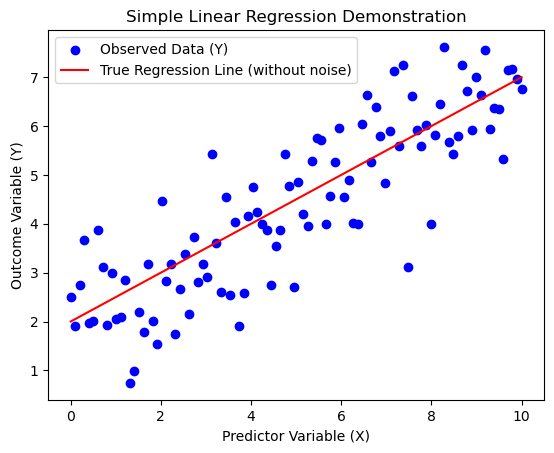

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)  # For reproducibility
beta_0 = 2  # Intercept
beta_1 = 0.5  # Slope
sigma = 1  # Standard deviation of the error term

# Generate predictor variable X (independent variable)
X = np.linspace(0, 10, 100)  # 100 points from 0 to 10

# Generate normally distributed error term epsilon
epsilon = np.random.normal(0, sigma, X.shape)

# Compute the outcome variable Y based on the SLR model
Y = beta_0 + beta_1 * X + epsilon

# Plotting the data points and the regression line
plt.scatter(X, Y, label="Observed Data (Y)", color='blue')
plt.plot(X, beta_0 + beta_1 * X, color='red', label="True Regression Line (without noise)")
plt.xlabel("Predictor Variable (X)")
plt.ylabel("Outcome Variable (Y)")
plt.legend()
plt.title("Simple Linear Regression Demonstration")
plt.show()


___
## 2.)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     269.9
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           6.61e-30
Time:                        08:30:10   Log-Likelihood:                -131.66
No. Observations:                 100   AIC:                             267.3
Df Residuals:                      98   BIC:                             272.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8272      0.181     10.094      0.0

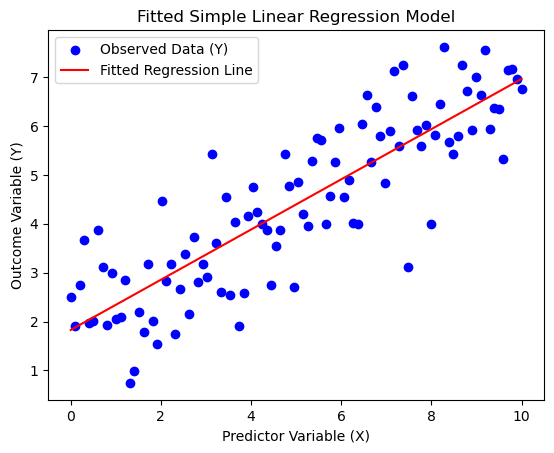

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Step 1: Simulate the data
np.random.seed(42)  # For reproducibility

# Model parameters
beta_0 = 2  # Intercept
beta_1 = 0.5  # Slope
sigma = 1  # Standard deviation of the error term

# Generate predictor variable X
X = np.linspace(0, 10, 100)

# Generate error term epsilon
epsilon = np.random.normal(0, sigma, X.shape)

# Compute outcome variable Y
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame for the dataset
data = pd.DataFrame({'X': X, 'Y': Y})

# Step 2: Fit the Simple Linear Regression model
model = smf.ols(formula='Y ~ X', data=data).fit()

# Display the summary of the model
print(model.summary())

# Step 3: Visualize the fitted model
plt.scatter(data['X'], data['Y'], label='Observed Data (Y)', color='blue')
plt.plot(data['X'], model.fittedvalues, color='red', label='Fitted Regression Line')
plt.xlabel("Predictor Variable (X)")
plt.ylabel("Outcome Variable (Y)")
plt.legend()
plt.title("Fitted Simple Linear Regression Model")
plt.show()


___
## 3.) 

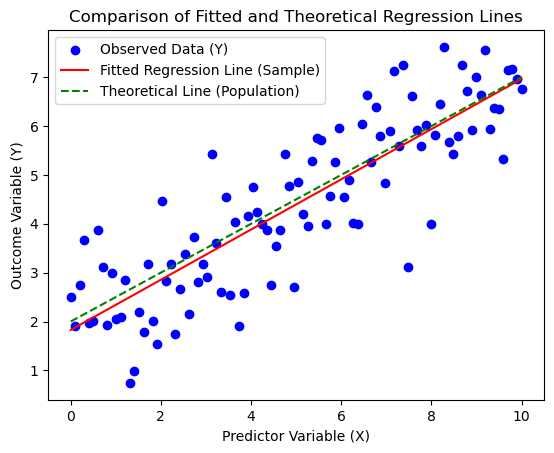

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Set the random seed for reproducibility
np.random.seed(42)

# Theoretical model parameters
beta_0 = 2  # Intercept of the theoretical line
beta_1 = 0.5  # Slope of the theoretical line
sigma = 1  # Standard deviation of the error term

# Generate predictor variable X
X = np.linspace(0, 10, 100)

# Generate the error term epsilon
epsilon = np.random.normal(0, sigma, X.shape)

# Compute the outcome variable Y based on the SLR model with random error
Y = beta_0 + beta_1 * X + epsilon

# Create a DataFrame for the dataset
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the Simple Linear Regression model
model = smf.ols(formula='Y ~ X', data=data).fit()

# Plot the observed data points
plt.scatter(data['X'], data['Y'], label='Observed Data (Y)', color='blue')

# Plot the fitted regression line from the model
plt.plot(data['X'], model.fittedvalues, color='red', label='Fitted Regression Line (Sample)')

# Plot the theoretical line from Question 1 (without noise)
plt.plot(X, beta_0 + beta_1 * X, color='green', linestyle='--', label='Theoretical Line (Population)')

# Label the plot
plt.xlabel("Predictor Variable (X)")
plt.ylabel("Outcome Variable (Y)")
plt.legend()
plt.title("Comparison of Fitted and Theoretical Regression Lines")
plt.show()

When we add the line from Question 1 to Question 2's code, we are adding the *theoretical line*. This theoretical line represents the true relationship between the predictor variable *$x$<sub>*i*</sub>* and outcome variable *$Y$<sub>*i*</sub>* where we assume that there is no random variation in the relationship. We can define this line as the result of not including the random error term ϵ<sub>*i*</sub>.

Comparing the theoretical line and fitted line, the theoretical line shows the ideal relationship for the two variables if there was no random variation -- representing the "true" underlying trend in the population. Meanwhile, the fitted line includes the random variation in the equation wherein the line varies each time we generate a new sample because it depends on the random sampling variation.


## 4.)

The `fitted_model.fittedvalues` in a fitted linear regression model represent the predicted values of the dependent variable *$Y$<sub>*i*</sub>* based on the model’s estimated parameters. The following steps explain how `fitted_model.fittedvalues` is derived:

1. **Model Specification**

As we know, in a simple linear regression model, the relationship between *x<sub>*i*</sub>* and *Y<sub>*i*</sub>* is expressed as:

> *$Y$<sub>*i*</sub>* = β<sub>0</sub> + β<sub>1</sub>*$x$<sub>*i*</sub>* + ϵ<sub>*i*</sub>

wherein:
- β<sub>0</sub> is the intercept.
- β<sub>1</sub> is the slope.
- ϵ<sub>*i*</sub> is the error term.

2. **Fitting the Model**

Using `smf.ols()`, the algorithm estimates the coefficients β<sub>0</sub> and β<sub>1</sub> by minimizing the sum of squared differences between the observed values *$Y$<sub>*i*</sub>* and predicted values *$\hat{Y}$<sub>*i*</sub>*.

3. **Extracting the Parameters**

After fitting the model, we can then access the estimated coefficients through `fitted_model.params` which gives us a Series where the index corresponds to the coefficients such as the intercept and slope associated with *$x$<sub>*i*</sub>*.

4. **Calculating Fitted Values**

The fitted values *$\hat{Y}$<sub>*i*</sub>* are then calculated by the estimated coefficients:

> *$\hat{Y}$<sub>*i*</sub>* = $\hat{β}$<sub>0</sub> + $\hat{β}$<sub>1</sub>*$x$<sub>*i*</sub>*

The calculation is performed on each value in the dataset, yielding the predicted *$Y$<sub>*i*</sub>* values that are stored in `fitted_model.fittedvalues`.

`fitted_model.summary().tables[1]` provides a detailed summary of the regression results, including the coefficients and their significance levels. Specifically, it shows:
- The coefficient estimates for the intercept and the slope,
- The standard errors of these estimates,
- t-values and p-values for hypothesis tests regarding each coefficient.

___
## 5.)


The Ordinary Least Squares (OLS) method computes the line of best fit by adjusting the slope and intercept until the total error is minimized. The reason why it requires "squares" is because we want to eliminate negative values and we want emphasis on larger errors.

___
## 6.)


#### `1-((Y-fitted_model.fittedvalues)**2).sum()/((Y-Y.mean())**2).sum()` as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"
The expression provided is a calculation for the coefficient of determination, commonly known as $R^2$. This statistic measures how well the independent variables in a regression model explain the variability of the dependent variable (outcome $Y$).
- `Y-fitted_model.fittedvalues)**2).sum()` represents the total squared error (residual sum of squares) of the model. It quantifies how much of the variance in $Y$ is not explained by the fitted model.
- `((Y-Y.mean())**2).sum()` represents the total variance in the outcome variable $Y$ (total sum of squares). It indicates the total variability present in $Y$ before any modeling occurs.
- The fraction essentially describes the proportion of the total variation in $Y$ that is not explained by the model (the unexplained variation). Therefore, `1−` that fraction gives the proportion of the total variation that is explained by the model, which is what $R^2$ represents.

#### why `fitted_model.rsquared` can be interpreted as a measure of the accuracy of the model

As stated before, $R^2$ is the calculation for the coefficient of determination which quantifies the proportion of the variance in the dependent variable (outcome $Y$) that is predictable from the independent variables. $R^2$ values usually range from 0 to 1 where if:
- **$R^2$ = 0**, then the model explains that none of the variability in the outcome is variable. The predictions are simply no better than using the mean of $Y$.
- **$R^2$ = 1**, then the model explains all the variability in the outcome variable. The predictions perfectly fit the data.
- **Values between 0 and 1**, then it indicates that the proportion of variance explained by the model. For example, an $R^2$ of 0.80 means that 80% of the variance in $Y$ is explained by the model.

We can say that a higher $R^2$ indicates a better fit. This suggests that the model explains a large portion of the variance in the outcome variable, which is generally associated with a more accurate model.

#### what the two `np.corrcoef(...)[0,1]**2` expressions capture in the context of Simple Linear Regression models.

The two expressions involve the calculation of the squared correlation coefficient between two sets of data.

`np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2`
- The squared correlation coefficient measures the strength and direction of the linear relationship between the actual values $Y$ and the predicted values. It indicates how well the fitted values correlate with the actual values.
- A value close to 1 suggests that the model predictions are closely aligned with the actual observations, while a value closer to 0 suggests a weak relationship. This expression essentially captures the proportion of variance in $Y$ explained by the model's fitted values.

`np.corrcoef(Y, x)[0,1]**2`
- This squared correlation coefficient measures the strength and direction of the linear relationship between the actual values $Y$ and the independent variable $x$. It indicates how much variability in the outcome $Y$ can be explained by the independent variable $x$ alone.
- Similar to the first expression, a value close to 1 implies that changes in $x$ are closely related to changes in $Y$, suggesting that $x$ is a good predictor of $Y$.




___
## 7.)

1. Linearity Assumption
2. Homoscedasticity

___
## 8.)



In this context, the null hypothesis, H<sub>0</sub> of "no linear association" between the variables can be stated as:

H<sub>0</sub>: β<sub>1</sub> = 0

where: 
β<sub>1</sub> - is the slope coefficient of the regression line relating wating time and duration of Old Faithful Geyser eruptions.

The overall equation implies that, on average, there is no linear relationship between waiting time and duration of eruptions in the Old Faithful dataset.



In [4]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        19:42:57   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can observe that we can reject the null hypothesis considering that the p-value under `waiting` is less than 0.001 which indicates very strong evidence against the null hypothesis. Furthermore, the confidence interval in `waiting` does not contain zero which is another way of saying that we should reject the null hypothesis.

This means that there is a positive linear relationship between waiting time and eruption duration.

___

## 9.)



Regression Results for Wait Times < 62 minutes
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


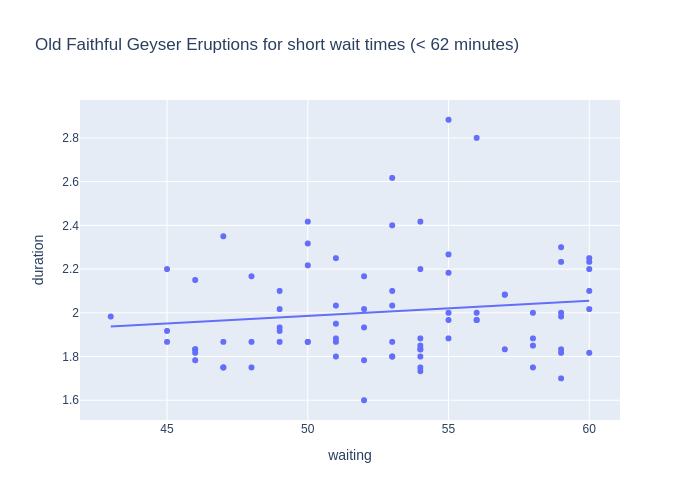


Regression Results for Wait Times < 64 minutes
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


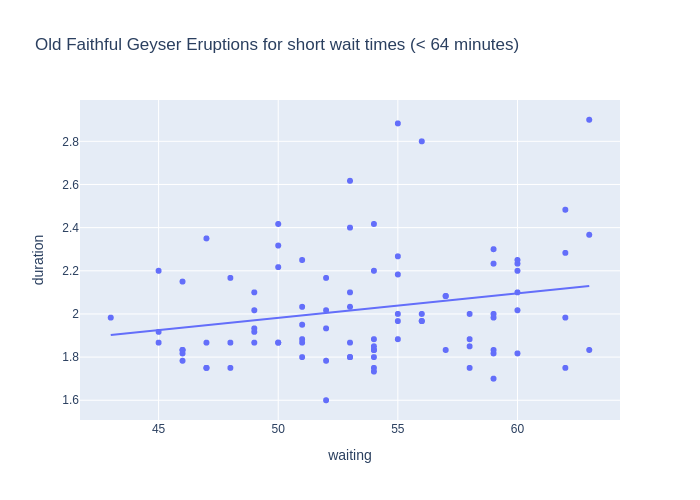


Regression Results for Wait Times < 66 minutes
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


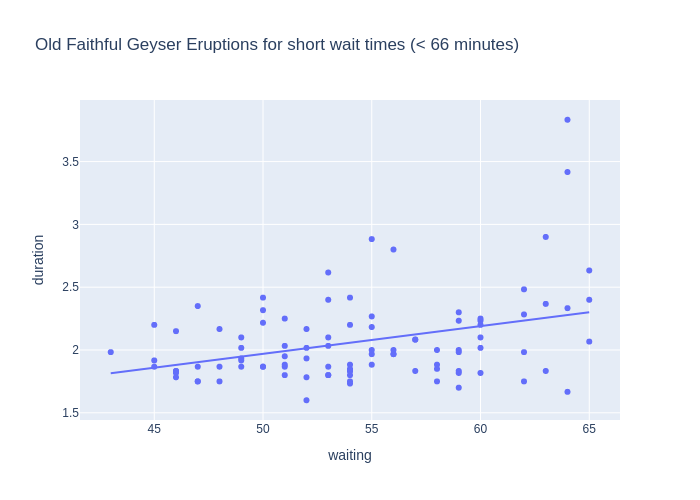

In [9]:
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

# Load dataset
old_faithful = sns.load_dataset('geyser')

# Set different short wait time limits to test
for short_wait_limit in [62, 64, 66]:
    # Filter data based on current short wait time limit
    short_wait = old_faithful.waiting < short_wait_limit
    subset = old_faithful[short_wait]
    
    # Fit linear regression model for current subset
    model = smf.ols('duration ~ waiting', data=subset).fit()
    
    # Display regression summary
    print(f"\nRegression Results for Wait Times < {short_wait_limit} minutes")
    print(model.summary().tables[1])
    
    # Create a scatter plot with linear regression trendline
    fig = px.scatter(
        subset, x='waiting', y='duration',
        title=f"Old Faithful Geyser Eruptions for short wait times (< {short_wait_limit} minutes)",
        trendline='ols'
    )
    fig.show(renderer="png")


In this context, the null hypothesis, H<sub>0</sub> of "no linear association" between the variables can be stated as:

H<sub>0</sub>: β<sub>1</sub> = 0

Yes, there is evidence in the data for a relationship between duration and wait time in the same manner as in the full data set.

Here are the interpretations for each of the indicated `short_wait_limit` values:

**a.) < 62**
- For short wait times < 62, we can observe that the p-value in `waiting` is greater than 0.1 which suggests no evidence against the null hypothesis. Additionally, the confidence interval indicated in the summary contains zero which further suggests that we fail to reject the null hypothesis.
- We can infer that for wait times less than 62 minutes, there is no significant evidence of a linear relationship between waiting time and eruption duration.

**b.) < 64**
- For short wait times < 64, we can observe that the p-value in `waiting` is greater than 0.01 but less than 0.05 which suggests moderate evidence against the null hypothesis. Additionally, the confidence interval indicated in the summary does not contain zero which further suggests that we can reject the null hypothesis.
- This could mean that, for wait times less than 64 minutes, there is evidence of a statistically significant relationship between waiting time and eruption duration.

**b.) < 66**
- For short wait times < 66, we can observe that the p-value in `waiting` is less than 0.001 which suggests very strong evidence against the null hypothesis. Additionally, the confidence interval indicated in the summary does not contain zero which further suggests that we can reject the null hypothesis.
- For wait times under 66 minutes, there is a highly significant linear relationship between waiting time and eruption duration, indicating that even within this restricted range, the waiting time has a substantial impact on the duration of eruptions.

All in all, as the short wait limit increases, we observe progressively stronger evidence of a linear relationship between waiting time and eruption duration.

___
## 10.)



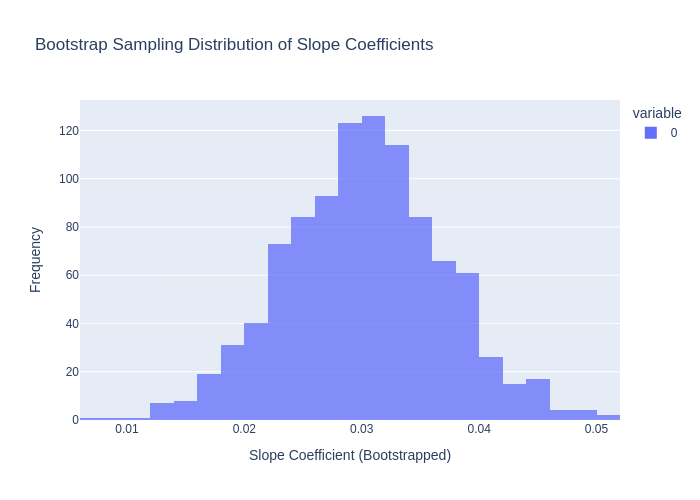

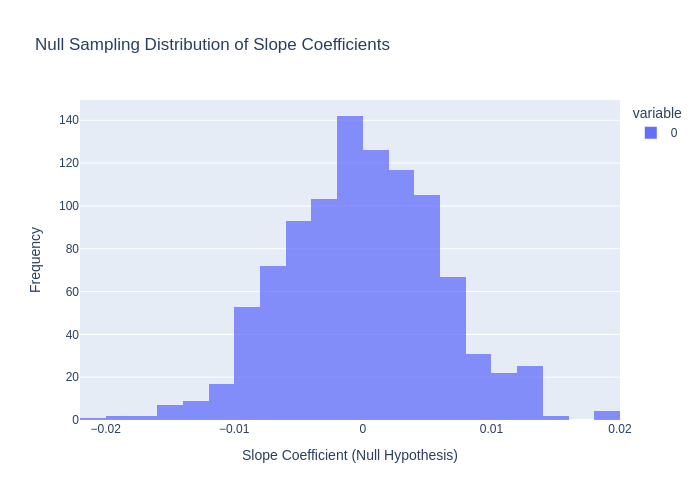

95% Bootstrap Confidence Interval for Slope: (0.0168, 0.0442)
Original Slope: 0.0307
Is the original slope within the 95% bootstrap CI? Yes
Simulated p-value: 0.0000
p-value from original model: 0.0000


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.8196,0.439,4.144,0.000,0.953,2.686
waiting,0.0307,0.005,5.608,0.000,0.020,0.041


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.express as px

# Load Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Step 1: Filter dataset to include only long wait times
long_wait = old_faithful['waiting'] >= 66  # Change threshold as needed
long_wait_data = old_faithful[long_wait]

# Step 2: Bootstrap Sampling Distribution of Fitted Slope Coefficients
n_bootstraps = 1000
boot_slope_coeffs = []

for _ in range(n_bootstraps):
    # Sample with replacement
    bootstrap_sample = long_wait_data.sample(n=len(long_wait_data), replace=True)
    # Fit model to bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    # Collect the slope coefficient
    boot_slope_coeffs.append(model.params['waiting'])

# Visualize the bootstrapped sampling distribution of the fitted slope coefficients
fig_boot = px.histogram(boot_slope_coeffs, nbins=30, title="Bootstrap Sampling Distribution of Slope Coefficients",
                        labels={'value': 'Slope Coefficient'}, opacity=0.75)
fig_boot.update_layout(xaxis_title="Slope Coefficient (Bootstrapped)", yaxis_title="Frequency")
fig_boot.show(renderer="png")

# Step 3: Simulate Sampling Distribution of Slope under Null Hypothesis
null_slope_coeffs = []
n_simulations = 1000

# Get the true intercept from the original model
original_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
true_intercept = original_model.params['Intercept']

for _ in range(n_simulations):
    # Generate simulated y values under null hypothesis (slope = 0)
    y_sim = true_intercept + np.random.normal(scale=long_wait_data['duration'].std(), size=len(long_wait_data))
    # Create a new DataFrame for the simulated data
    sim_data = pd.DataFrame({
        'waiting': long_wait_data['waiting'].values,  # Ensure it matches length of y_sim
        'duration': y_sim
    })
    # Fit model to simulated data
    sim_model = smf.ols('duration ~ waiting', data=sim_data).fit()
    # Collect the slope coefficient
    null_slope_coeffs.append(sim_model.params['waiting'])

# Visualize the null sampling distribution of slope coefficients
fig_null = px.histogram(null_slope_coeffs, nbins=30, title="Null Sampling Distribution of Slope Coefficients",
                        labels={'value': 'Slope Coefficient'}, opacity=0.75)
fig_null.update_layout(xaxis_title="Slope Coefficient (Null Hypothesis)", yaxis_title="Frequency")
fig_null.show(renderer="png")

# Step 4: Calculate Bootstrapped 95% Confidence Interval and Simulated p-value
# Calculate the 95% confidence interval from the bootstrap distribution
boot_ci_lower, boot_ci_upper = np.percentile(boot_slope_coeffs, [2.5, 97.5])

# Original slope from the full model on long wait times
original_slope = original_model.params['waiting']

# Check if the original slope is within the 95% CI
is_contained = boot_ci_lower <= original_slope <= boot_ci_upper

# Calculate simulated p-value
simulated_p_value = np.mean([abs(coef) >= abs(original_slope) for coef in null_slope_coeffs])

# Output results
print(f"95% Bootstrap Confidence Interval for Slope: ({boot_ci_lower:.4f}, {boot_ci_upper:.4f})")
print(f"Original Slope: {original_slope:.4f}")
print(f"Is the original slope within the 95% bootstrap CI? {'Yes' if is_contained else 'No'}")
print(f"Simulated p-value: {simulated_p_value:.4f}")

# Compare with p-value from original model
original_p_value = original_model.pvalues['waiting']
print(f"p-value from original model: {original_p_value:.4f}")

smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]

We can see that 0 is not contained in the confidence interval and the simulated p-value and p-value from the original model are the same.

___
## 11.)



The "big picture" differences include the following:
1. **Model Structure.** The new model uses an indicator variable for the wait time categories instead of fitting separate models for each category. This provides a direct comparison between the two categories in a single framework, allowing for more straightforward interpretation and statistical testing.
2. **Data Utilization**. The new model utilizes the entire dataset while differentiating between groups, whereas the previous models fit separate regressions for "short" and "long" wait times. This approach improves the efficiency of estimates by pooling information from both groups.
3. **Hypothesis Testing**. By employing the indicator variable model, we can directly test the null hypothesis of "no difference between groups on average" by evaluating the significance of β<sub>1</sub>. In contrast, the previous separate models required multiple comparisons, making it harder to draw overarching conclusions.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


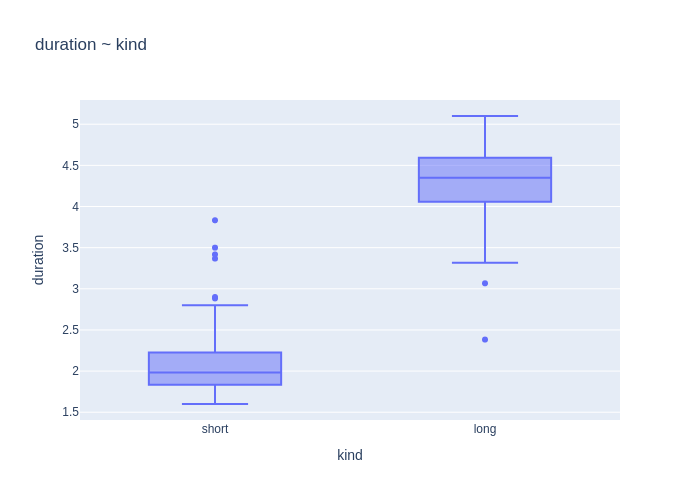

In [21]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png")

For the new indicator variable based model, we can see that the p-value is less than 0.001 which suggests a very strong evidence against the null hypothesis. We should reject the null hypothesis.

___
## 12.)



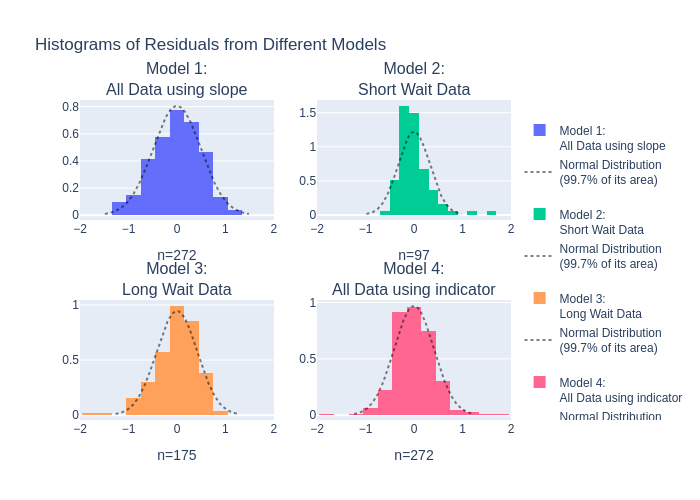

In [23]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png")

Model 1 best shows the plausibility of the assumption that the distribution of error terms is normal for each of the four models. This is because the criteria for normality must involve the following:
- Be symmetric around zero.
- Have a bell-shaped curve (normal distribution).
- Show no extreme skewness or kurtosis.

The other 3 models would not support the normality assumption as they exhibit significant departures from these characteristics. Although Model 4 is a close contender, Model 1 best fits the characteristic of a bell-shaped curve.

___
## 13.)



In [25]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats

# Load the dataset from Seaborn
old_faithful = sns.load_dataset('geyser')

# Split the data into short and long wait times based on waiting time
short_wait = old_faithful[old_faithful['waiting'] < 68]['duration']
long_wait = old_faithful[old_faithful['waiting'] >= 68]['duration']

# A. Permutation Test
def permutation_test(group1, group2, num_permutations=10000):
    observed_diff = np.mean(group1) - np.mean(group2)
    combined = np.concatenate([group1, group2])
    
    count = 0
    for _ in range(num_permutations):
        np.random.shuffle(combined)
        new_group1 = combined[:len(group1)]
        new_group2 = combined[len(group1):]
        new_diff = np.mean(new_group1) - np.mean(new_group2)
        
        if abs(new_diff) >= abs(observed_diff):
            count += 1
    
    p_value = count / num_permutations
    return observed_diff, p_value

observed_difference, p_value = permutation_test(short_wait, long_wait)
print(f"Observed Difference: {observed_difference:.4f}")
print(f"P-value: {p_value:.4f}")

# B. Bootstrap Confidence Interval
def bootstrap_confidence_interval(group1, group2, num_bootstraps=10000, alpha=0.05):
    bootstrapped_means_diff = []
    
    for _ in range(num_bootstraps):
        sample1 = np.random.choice(group1, size=len(group1), replace=True)
        sample2 = np.random.choice(group2, size=len(group2), replace=True)
        bootstrapped_means_diff.append(np.mean(sample1) - np.mean(sample2))
    
    lower_bound = np.quantile(bootstrapped_means_diff, alpha/2)
    upper_bound = np.quantile(bootstrapped_means_diff, 1 - alpha/2)
    return lower_bound, upper_bound

bootstrap_ci = bootstrap_confidence_interval(short_wait, long_wait)
print(f"95% Bootstrap Confidence Interval: [{bootstrap_ci[0]:.4f}, {bootstrap_ci[1]:.4f}]")

Observed Difference: -2.2036
P-value: 0.0000
95% Bootstrap Confidence Interval: [-2.3013, -2.1011]


a.) **Explanation of how the sampling approaches work for the two simulation**

The Permutation Test serves as a statistical hypothesis test to determine whether there is a significant difference in means between the two groups. It follows this procedure:
1. Calculate the observed difference in means between the two groups.
2. Merge the two groups into one dataset.
3. Randomly shuffle the combined dataset multiple times (e.g., 10,000 iterations).
4. For each shuffled dataset, divide the data back into two new groups and calculate the new difference in means.
5. Build a distribution of these differences based on the shuffled data.
6. Determine how many of the shuffled differences are as extreme or more extreme than the observed difference to compute a p-value.

For the Bootstrap Confidence Interval, we estimate a confidence interval for the difference in means between the two groups (short and long wait times). It follows this procedure:
1. For each group, generate many bootstrap samples by randomly sampling with replacement.
2. For each bootstrap sample, compute the mean duration for both the short and long wait groups.
3. Calculate the difference in means for each pair of bootstrap samples.
4. From the distribution of these differences, compute the 2.5th and 97.5th percentiles to create a 95% confidence interval.

a.) **Compare and contrast these two methods with the indicator variable based model approach used in Question 11, explaining how they're similar and different.**

<ins>*Similarities*</ins>
- All three approaches aim to assess differences between two groups—specifically, in this context, the difference in eruption duration between short and long wait times at the Old Faithful geyser. They each seek to determine whether there is a statistically significant difference in means or a relationship associated with group membership.
- Each method is centered on the response variable, eruption duration, and its association with the wait time category (short vs. long). They all analyze how wait time impacts the duration of geyser eruptions.
- The permutation test and bootstrap confidence interval are both non-parametric methods that do not rely on specific distributional assumptions (like normality). While the regression model assumes linearity and normality of residuals, it can still provide valuable insights even with some departures from these assumptions.
- Each approach allows for statistical inference. The permutation test yields a p-value indicating whether the observed difference in means is statistically significant. The bootstrap method provides a confidence interval that estimates the range of the true difference in means. The regression model provides coefficients and p-values for assessing the significance of group membership (kind) on eruption duration.

<ins>*Differences*</ins>

**Nature of Analysis**.
- Permutation/Bootstrap: These methods are primarily used for hypothesis testing and constructing confidence intervals, focusing specifically on differences between group means without fitting a model.
- Regression Model: This approach fits a statistical model to data, allowing for broader interpretations and the potential inclusion of additional covariates or factors influencing eruption duration.

**Output**
- Permutation/Bootstrap: Provides specific measures (p-value and confidence interval) for assessing the difference in means.
- Regression Model: Produces a comprehensive output that includes coefficients for each category, along with standard errors, statistical significance, and overall model fit statistics.

**Flexibility**
- Permutation/Bootstrap: Primarily focuses on two-group comparisons. While they can be adapted for more complex situations, they do not directly account for other variables unless extended.
- Regression Model: Can easily incorporate multiple predictors, interactions, and control for confounding variables, providing a more nuanced understanding of the relationship between waiting time and eruption duration.

**Assumption**
- Permutation/Bootstrap: These methods are non-parametric and do not assume a specific distribution for the data.
- Regression Model: Assumes linearity, normality of residuals, homoscedasticity, and independence of observations.

___
## 14.)
Somewhat.

___
## ChatGPT Summaries:

### Simple Linear Regression Explained

https://chatgpt.com/share/6727e93a-5954-8011-a865-6d90f09be3b4

### R squared Interpretation

https://chatgpt.com/share/6727e952-53e0-8011-a52e-8a4691f76832

### Indicator Variable Model Summary

https://chatgpt.com/share/6727e972-8304-8011-b6f4-9894b038b2bb